In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('breast_cancer_wisconsin.csv')

In [3]:
df.head()

,Unnamed: 0,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,0,5,1,1,1,2,1,3,1,1,2
1,1,5,4,4,5,7,10,3,2,1,2
2,2,3,1,1,1,2,2,3,1,1,2
3,3,6,8,8,1,3,4,3,7,1,2
4,4,4,1,1,3,2,1,3,1,1,2


In [4]:
#To check if there are any null values in the dataset.
df.isnull().sum()


Unnamed: 0                     0
Clump_Thickness                0
Uniformity_of_Cell_Size        0
Uniformity_of_Cell_Shape       0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
 X=df.iloc[ :,:-1]
 y=df.iloc[:,-1:]
 X

,Unnamed: 0,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,0,5,1,1,1,2,1,3,1,1
1,1,5,4,4,5,7,10,3,2,1
2,2,3,1,1,1,2,2,3,1,1
3,3,6,8,8,1,3,4,3,7,1
4,4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...
678,694,3,1,1,1,3,2,1,1,1
679,695,2,1,1,1,2,1,1,1,1
680,696,5,10,10,3,7,3,8,10,2
681,697,4,8,6,4,3,4,10,6,1


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
classifier = DecisionTreeClassifier(criterion='entropy')

In [19]:
classifier=classifier.fit(X_train, y_train)

In [20]:
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

In [21]:
print("Accuracy for training:", accuracy_score(y_train, y_train_pred))
print("Accuracy for testing: ", accuracy_score(y_test,y_test_pred))

Accuracy for training: 1.0
Accuracy for testing:  0.9414634146341463


In [13]:
print("Precision for training: ", precision_score(y_train, y_train_pred, average='weighted'))
print("Precision for testing:",precision_score(y_test,y_test_pred, average='weighted'))

Precision for training:  1.0
Precision for testing: 0.9260731547799453


In [14]:
print("Recall for training: ",recall_score(y_train, y_train_pred, average='weighted'))
print("Recall for testing: ",recall_score(y_test, y_test_pred, average='weighted'))

Recall for training:  1.0
Recall for testing:  0.9219512195121952


In [15]:
print("F1-score for training: ", f1_score(y_train, y_train_pred, average='weighted'))
print("F1-score for testing: ", f1_score(y_test, y_test_pred, average= 'weighted'))

F1-score for training:  1.0
F1-score for testing:  0.9204596857998656


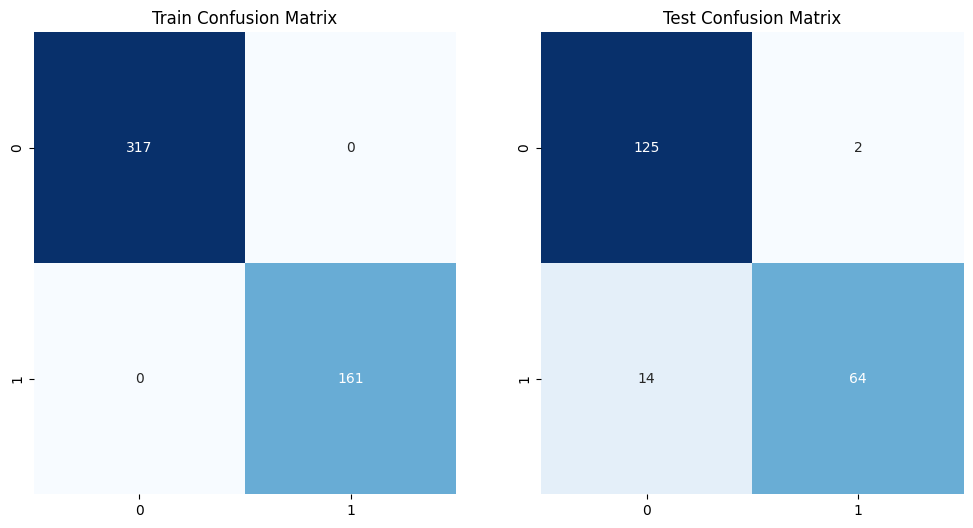

In [16]:
#In order to train the confusion matrices the following steps need to be followed
#Confusion matrix on train set.
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
#Confusion matrix on test set.
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(train_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Train Confusion Matrix")
plt.subplot(1, 2, 2)
sns.heatmap(test_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Test Confusion Matrix")
plt.show()

It can be seen from the above plot that the False Positive in the train confusion matrix and the False Negative in the train confusion matrix are 0 which infers that the model has predicted optimally.

It can be seen from the above plot that the False Positive in the test confusion matrix and the False Negative in the test confusion matrix are 4 and 13 respectively which infers that the model has predicted efficiently but an optimal fit has not been produced.

In [53]:
depths = [2, 4, 6, 8, 10, 12]
criteria = ['gini', 'entropy', 'log_loss']
# Initialize lists to store data for plotting
depth_values = []
criterion_values = []
accuracy_values = []
recall_values = []
f1_score_values = []

# Loop through depth and criterion combinations
for depth in depths:
    for criterion in criteria:
        classifier = DecisionTreeClassifier(max_depth=depth, criterion=criterion)
        classifier.fit(X_train, y_train)
        test_predictions = classifier.predict(X_test)
        test_accuracy = accuracy_score(y_test, test_predictions)
        test_recall = recall_score(y_test, test_predictions, average='macro')
        test_f1_score = f1_score(y_test, test_predictions, average='macro')

        depth_values.append(depth)
        criterion_values.append(criterion)
        accuracy_values.append(test_accuracy)
        recall_values.append(test_recall)
        f1_score_values.append(test_f1_score)
        print(f"The efficiency of the decision tree with max depth: {depth} and  criterion: {criterion} is:")
        print(f"Train Accuracy: {train_accuracy}")
        print(f"Test Accuracy: {test_accuracy}")
        print(f"Recall: {test_recall}")
        print(f"F-1 score: {test_f1_score}")

The efficiency of the decision tree with max depth: 2 and  criterion: gini is:
Train Accuracy: 1.0
Test Accuracy: 0.9414634146341463
Recall: 0.937916414294367
F-1 score: 0.937916414294367
The efficiency of the decision tree with max depth: 2 and  criterion: entropy is:
Train Accuracy: 1.0
Test Accuracy: 0.9414634146341463
Recall: 0.9478094084393297
F-1 score: 0.9390243902439025
The efficiency of the decision tree with max depth: 2 and  criterion: log_loss is:
Train Accuracy: 1.0
Test Accuracy: 0.9414634146341463
Recall: 0.9478094084393297
F-1 score: 0.9390243902439025
The efficiency of the decision tree with max depth: 4 and  criterion: gini is:
Train Accuracy: 1.0
Test Accuracy: 0.9219512195121952
Recall: 0.9098021401171007
F-1 score: 0.9158974358974359
The efficiency of the decision tree with max depth: 4 and  criterion: entropy is:
Train Accuracy: 1.0
Test Accuracy: 0.926829268292683
Recall: 0.9186856450635978
F-1 score: 0.9217975127794309
The efficiency of the decision tree with ma


It can be observed that as the max depth increases from 2 to 10, the test accuracy generally improves or remains stable. However, after reaching a max depth of 10, the test accuracy starts to fluctuate or even decrease slightly for some criterion. This suggests that a max depth of 10 might be optimal for this dataset, as it achieves the highest test accuracy with the entropy criterion.
Criterion Comparison:

Decision trees can be split using different criteria, commonly Gini impurity, entropy, or classification error (misclassification error). The choice of criterion can impact the resulting tree and its performance.
In this case, the entropy criterion tends to perform slightly better than the Gini criterion across different max depths. This is evident from the fact that, for most max depths, decision trees using the entropy criterion achieve higher or comparable test accuracies compared to those using the Gini criterion.
The log loss criterion seems to perform similarly to entropy in terms of test accuracy, indicating that it might not offer significant advantages over entropy in this scenario.
Model Evaluation:

It's crucial to evaluate models not only based on training accuracy but also on test accuracy to gauge their generalization performance.
While some models achieve high training accuracy (even 100% in the case of max depth 8, 10, and 12), the test accuracy may vary. This discrepancy suggests potential overfitting, especially for higher max depths.
Models with higher test accuracy are preferred as they are more likely to perform well on unseen data, indicating better generalization ability.

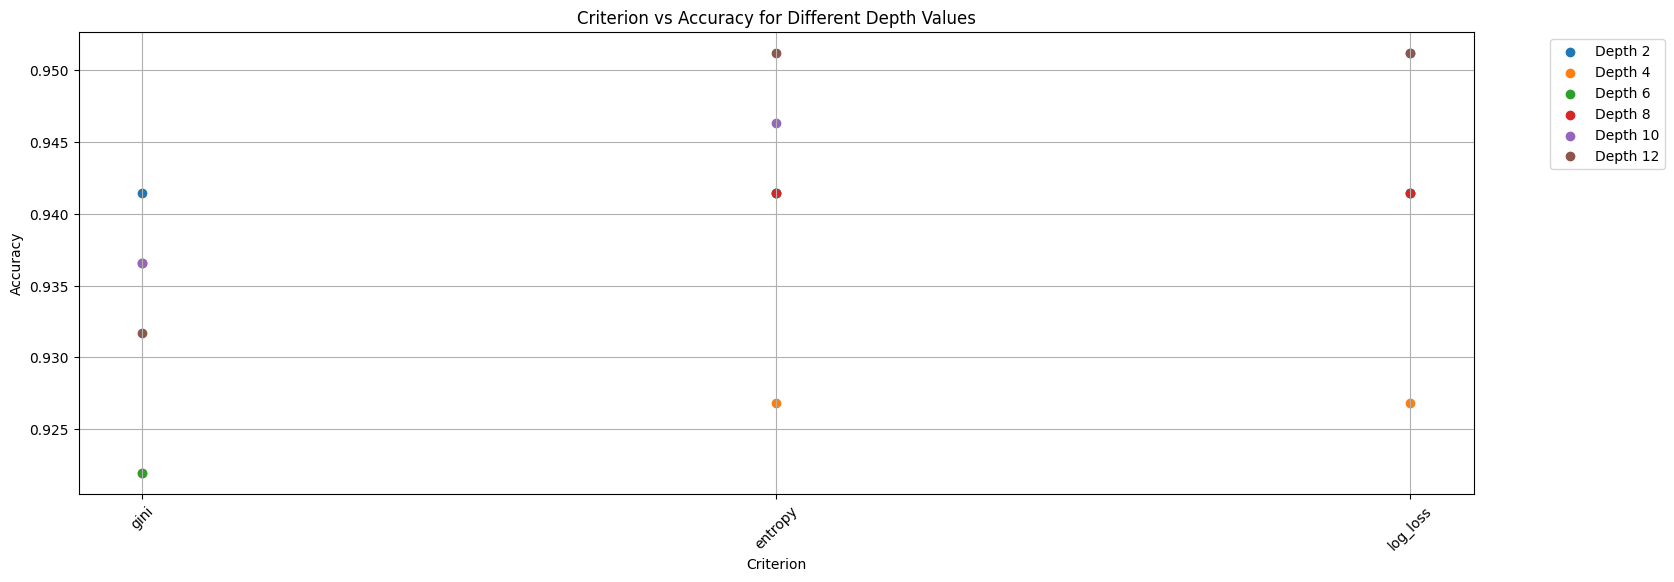

In [64]:
# Plotting Criterion vs Accuracy
plt.figure(figsize=(18, 6))


for depth in depths:
    plt.scatter([criterion_values[i] for i, depth_value in enumerate(depth_values) if depth_value == depth],
            [accuracy_values[i] for i, depth_value in enumerate(depth_values) if depth_value == depth],
            label=f'Depth {depth}')

plt.title('Criterion vs Accuracy for Different Depth Values')
plt.xlabel('Criterion')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

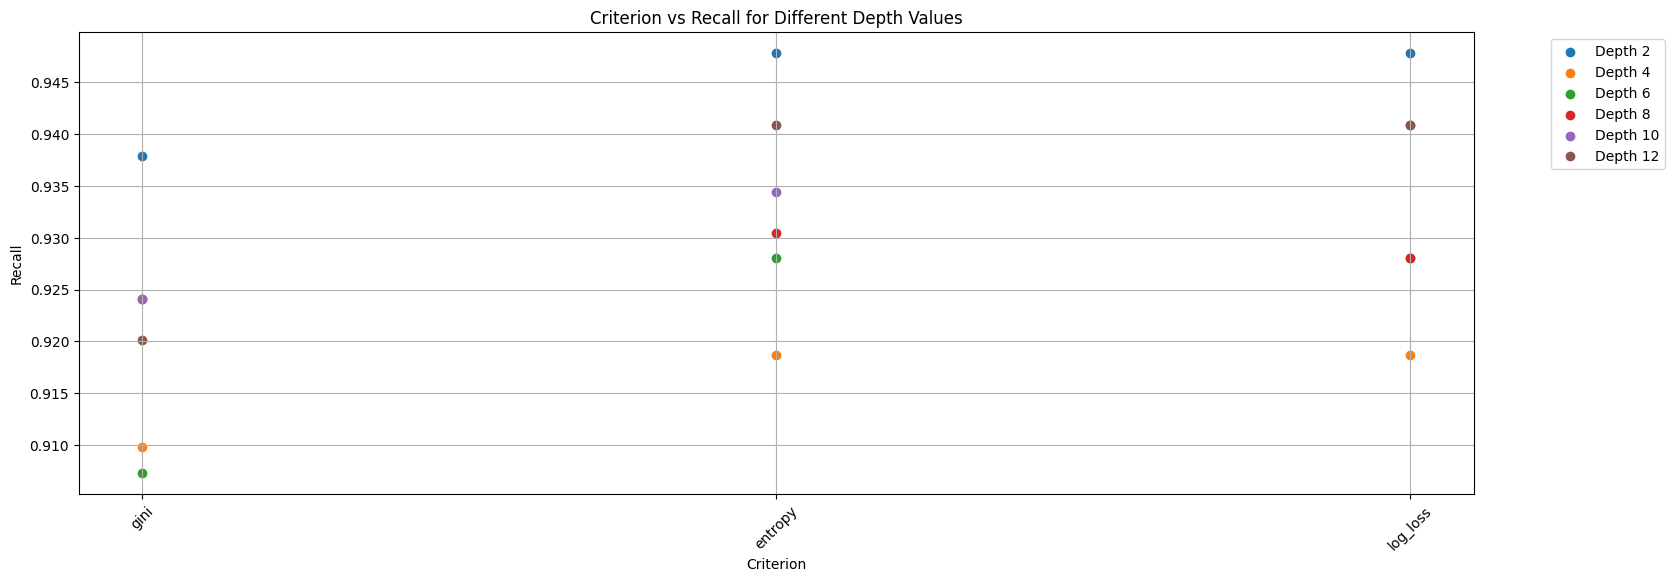

In [65]:
import matplotlib.pyplot as plt

# Assuming depths, criterion_values, and recall_values are defined elsewhere
plt.figure(figsize=(18, 6))
# Plotting Criterion vs Recall
for depth in depths:
    plt.scatter([criterion_values[i] for i, depth_value in enumerate(depth_values) if depth_value == depth],
                [recall_values[i] for i, depth_value in enumerate(depth_values) if depth_value == depth],
                label=f'Depth {depth}')

plt.title('Criterion vs Recall for Different Depth Values')
plt.xlabel('Criterion')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.grid(True)

# Adjusting the legend position
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


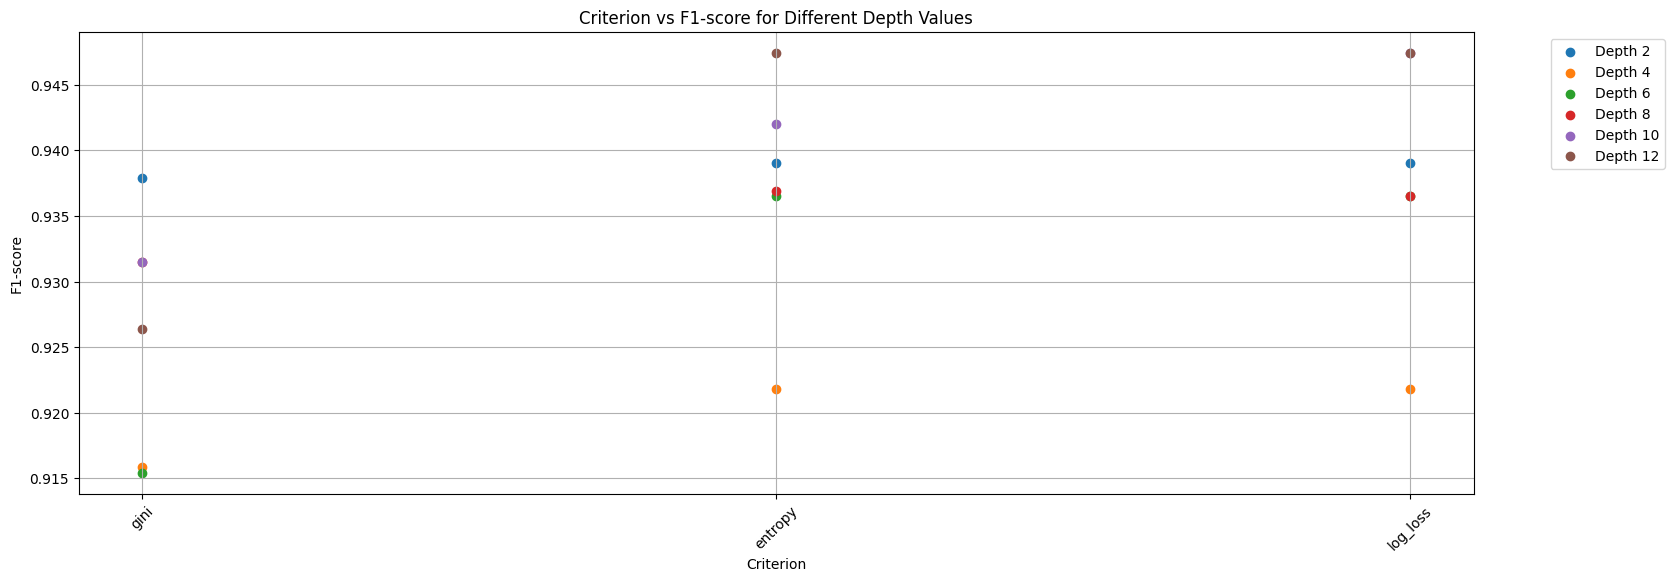

In [66]:

# Plotting Criterion vs F1-score
plt.figure(figsize=(18, 6))
for depth in depths:
    plt.scatter([criterion_values[i] for i, depth_value in enumerate(depth_values) if depth_value == depth],
            [f1_score_values[i] for i, depth_value in enumerate(depth_values) if depth_value == depth],
            label=f'Depth {depth}')

plt.title('Criterion vs F1-score for Different Depth Values')
plt.xlabel('Criterion')
plt.ylabel('F1-score')
plt.xticks(rotation=45)
plt.grid(True)


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Accuracy: Higher max depths tend to lead to slightly higher test accuracies, but the differences are not significant.

Recall: Recall varies across different max depths and criteria but generally remains high, ranging from approximately 0.91 to 0.94.

F1-score: Like recall, F1-score also remains high across different max depths and criteria, ranging from approximately 0.92 to 0.95.

Criterion: Comparing different criteria (gini, entropy, log_loss), minimal differences is observed in performance metrics. There are no significant differences in accuracy, recall, or F1-score between different criteria for the same max depth.

Max Depth Impact:  Observing the provided data, the optimal max depth seems to be around 10 or 12. These max depths consistently yield high test accuracy, recall, and F1-score, with no significant improvements observed for larger max depths. Specifically, the models with max depth 10 and 12 consistently achieve the highest test accuracy, recall, and F1-score among the provided configurations.